In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
df.shape

(4687, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Neo Reference ID,4687.0,3.272298e+06,5.486011e+05,2.000433e+06,3.097594e+06,3.514799e+06,3.690060e+06,3.781897e+06
Name,4687.0,3.272298e+06,5.486011e+05,2.000433e+06,3.097594e+06,3.514799e+06,3.690060e+06,3.781897e+06
Absolute Magnitude,4687.0,2.226786e+01,2.890972e+00,1.116000e+01,2.010000e+01,2.190000e+01,2.450000e+01,3.210000e+01
Est Dia in KM(min),4687.0,2.046042e-01,3.695734e-01,1.010543e-03,3.346224e-02,1.108039e-01,2.538370e-01,1.557955e+01
Est Dia in KM(max),4687.0,4.575089e-01,8.263912e-01,2.259644e-03,7.482384e-02,2.477650e-01,5.675969e-01,3.483694e+01
Est Dia in M(min),4687.0,2.046042e+02,3.695734e+02,1.010543e+00,3.346224e+01,1.108039e+02,2.538370e+02,1.557955e+04
Est Dia in M(max),4687.0,4.575089e+02,8.263912e+02,2.259644e+00,7.482384e+01,2.477650e+02,5.675969e+02,3.483694e+04
Est Dia in Miles(min),4687.0,1.271351e-01,2.296422e-01,6.279224e-04,2.079246e-02,6.885032e-02,1.577270e-01,9.680682e+00
Est Dia in Miles(max),4687.0,2.842828e-01,5.134956e-01,1.404077e-03,4.649336e-02,1.539540e-01,3.526882e-01,2.164666e+01
Est Dia in Feet(min),4687.0,6.712737e+02,1.212511e+03,3.315431e+00,1.097842e+02,3.635298e+02,8.327987e+02,5.111402e+04


In [6]:
#checking missing values
df.isna().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [7]:
df = df.drop(['Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Est Dia in KM(max)',
              'Relative Velocity km per hr', 'Miles per hour',
              'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)',
              'Semi Major Axis',
              'Neo Reference ID', 'Name',
              'Close Approach Date', 'Epoch Date Close Approach', 'Orbit Determination Date'],axis=1)

<AxesSubplot:>

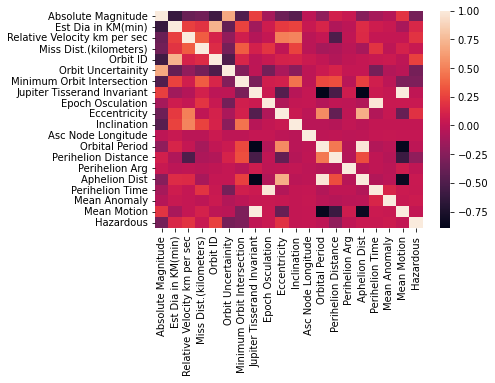

In [8]:
sns.heatmap(df.corr())

In [9]:
df.corr()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Absolute Magnitude,1.000000,-0.613482,-0.376853,-0.339117,-0.575668,0.677764,-0.488235,0.238702,-0.116087,-0.361359,-0.459632,-0.011470,-0.206774,0.086966,0.031784,-0.256169,-0.115855,-0.049401,0.195652,-0.325522
Est Dia in KM(min),-0.613482,1.000000,0.242141,0.188027,0.724089,-0.399488,0.257904,-0.133582,0.061582,0.216623,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Relative Velocity km per sec,-0.376853,0.242141,1.000000,0.351694,0.110679,-0.202234,0.076306,-0.052294,0.020194,0.495053,0.514657,-0.021301,0.017961,-0.506978,-0.002913,0.144782,0.020006,0.017685,0.022452,0.191970
Miss Dist.(kilometers),-0.339117,0.188027,0.351694,1.000000,0.149814,-0.326158,0.351981,0.093969,0.193944,-0.005627,0.255828,-0.023033,-0.109888,-0.079937,-0.021483,-0.103231,0.189409,-0.010157,0.104642,0.032407
Orbit ID,-0.575668,0.724089,0.110679,0.149814,1.000000,-0.504578,0.124283,-0.019595,0.036152,0.100314,0.112125,0.047959,0.002705,-0.063884,0.001338,0.022269,0.037901,0.048985,-0.008898,0.247369
Orbit Uncertainity,0.677764,-0.399488,-0.202234,-0.326158,-0.504578,1.000000,-0.267524,-0.008992,-0.331558,-0.088029,-0.228806,-0.009618,0.047535,0.107946,0.016307,0.020908,-0.325784,-0.059396,-0.023776,-0.328721
Minimum Orbit Intersection,-0.488235,0.257904,0.076306,0.351981,0.124283,-0.267524,1.000000,-0.305849,0.081155,0.093795,0.439867,-0.008963,0.279885,0.299991,-0.029130,0.242023,0.080592,-0.013336,-0.290538,-0.288949
Jupiter Tisserand Invariant,0.238702,-0.133582,-0.052294,0.093969,-0.019595,-0.008992,-0.305849,1.000000,0.051062,-0.478341,-0.037366,0.018413,-0.893517,-0.537884,0.064496,-0.887879,0.051994,0.030972,0.992680,-0.003404
Epoch Osculation,-0.116087,0.061582,0.020194,0.193944,0.036152,-0.331558,0.081155,0.051062,1.000000,-0.067312,0.015879,0.017782,-0.056653,0.000093,-0.006703,-0.063625,0.977613,0.036881,0.045812,0.040940
Eccentricity,-0.361359,0.216623,0.495053,-0.005627,0.100314,-0.088029,0.093795,-0.478341,-0.067312,1.000000,0.039018,-0.015413,0.548521,-0.412612,-0.003210,0.701294,-0.064366,0.026161,-0.394860,0.183269


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Relative Velocity km per sec  4687 non-null   float64
 3   Miss Dist.(kilometers)        4687 non-null   float64
 4   Orbiting Body                 4687 non-null   object 
 5   Orbit ID                      4687 non-null   int64  
 6   Orbit Uncertainity            4687 non-null   int64  
 7   Minimum Orbit Intersection    4687 non-null   float64
 8   Jupiter Tisserand Invariant   4687 non-null   float64
 9   Epoch Osculation              4687 non-null   float64
 10  Eccentricity                  4687 non-null   float64
 11  Inclination                   4687 non-null   float64
 12  Asc Node Longitude            4687 non-null   float64
 13  Orb

In [11]:
df['Hazardous'].value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

In [12]:
encoder = LabelEncoder()

df['Hazardous'] = encoder.fit_transform(df.Hazardous)
df = df.drop(['Orbiting Body', 'Equinox'], axis = 1)

In [13]:
df_1=df.iloc[:,:-1]

In [14]:
#scaling data set
from sklearn.preprocessing import StandardScaler

# assume X is your dataset, and you want to scale it
scaler = StandardScaler()
df_1 = scaler.fit_transform(df_1)

In [15]:
df_1

array([[-0.23104209, -0.20941058, -1.07713904, ...,  0.45919023,
         0.77839321, -0.43110028],
       [-0.33482448, -0.15840557,  0.56814611, ...,  0.07081791,
        -0.06909298,  0.31258164],
       [-0.68076581,  0.07278876, -0.8748918 , ...,  0.41557933,
         1.03940428, -0.52211437],
       ...,
       [ 0.14949337, -0.34623784, -0.92961547, ...,  0.60624482,
         0.20776991, -0.63207867],
       [-0.16185382, -0.23970271, -0.35910064, ...,  0.5933032 ,
         0.2079915 , -0.56766111],
       [-1.09278193,  0.53049632,  3.01353552, ...,  0.62542342,
         0.03397983, -0.54733945]])

In [16]:
df_2 = pd.concat([df.iloc[:,-1], pd.DataFrame(df_1)], axis=1)
df_2.head()

,Hazardous,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1,-0.231042,-0.209411,-1.077139,1.116075,-0.295089,0.481822,-0.631720,-0.341049,0.300904,0.238216,-0.671955,1.377191,-0.070049,-0.021172,-1.223886,0.019571,0.459190,0.778393,-0.431100
1,0,-0.334824,-0.158406,0.568146,0.865921,-0.190639,-0.167955,1.158650,0.323902,0.300904,-0.171234,1.375315,-0.343192,-0.565393,-0.393267,1.247897,-0.514802,0.070818,-0.069093,0.312582
2,1,-0.680766,0.072789,-0.874892,-1.411843,-0.164526,-1.142621,-0.434844,-0.403261,0.300904,-0.190223,-0.835467,0.845573,0.021563,0.567722,0.623011,-0.021323,0.415579,1.039404,-0.522114
3,0,1.775418,-0.529864,-0.383539,0.195800,-0.556216,0.806711,-0.850681,0.029805,0.300904,-0.920002,-0.500038,-1.113477,-0.327568,0.704524,-1.596341,-0.482690,0.184540,-1.045928,-0.110818
4,1,-0.231042,-0.209411,-0.566337,1.036159,-0.086188,-0.817732,-0.526325,0.079090,0.300904,-0.953979,0.312713,-0.847599,-0.377402,0.637529,-0.248001,-0.529316,0.091457,-0.428186,-0.034580


In [108]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hazardous  4687 non-null   int64  
 1   0          4687 non-null   float64
 2   1          4687 non-null   float64
 3   2          4687 non-null   float64
 4   3          4687 non-null   float64
 5   4          4687 non-null   float64
 6   5          4687 non-null   float64
 7   6          4687 non-null   float64
 8   7          4687 non-null   float64
 9   8          4687 non-null   float64
 10  9          4687 non-null   float64
 11  10         4687 non-null   float64
 12  11         4687 non-null   float64
 13  12         4687 non-null   float64
 14  13         4687 non-null   float64
 15  14         4687 non-null   float64
 16  15         4687 non-null   float64
 17  16         4687 non-null   float64
 18  17         4687 non-null   float64
 19  18         4687 non-null   float64
dtypes: float

In [17]:
train_df, test_df = train_test_split(df_2, test_size=0.2, random_state=321)
train_df["Hazardous"] = train_df["Hazardous"]
test_df["Hazardous"] = test_df["Hazardous"]

In [18]:
X_train = train_df.drop(columns="Hazardous")
y_train = train_df["Hazardous"]
X_test = test_df.drop(columns="Hazardous")
y_test = test_df["Hazardous"]

In [19]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
2166,1.118129,-0.496547,0.099675,-0.200284,-0.477878,1.131599,-0.690449,0.012030,0.300904,-0.579665,-0.379231,0.744499,-0.325530,0.389566,-1.123987,-0.399980,0.178794,-1.011578,-0.113819
2147,-1.338054,0.949116,0.542706,0.147577,0.122713,-0.817732,-0.489311,2.985319,0.300904,0.823773,0.509470,-1.308521,-1.215004,-2.130255,1.633404,-1.066305,0.312701,1.250084,3.527705
3071,0.114899,-0.336461,-0.366971,-1.533306,-0.138413,0.156934,-0.614313,-0.509912,0.300904,-0.014627,-0.080379,-1.452665,0.108378,0.500412,0.457871,0.097256,0.005842,-0.362809,-0.599916
448,-0.957519,0.351844,1.010954,1.134476,0.070488,-1.142621,0.287738,-1.022158,0.300904,0.548203,2.393111,-1.044445,0.521651,0.339534,-0.714461,0.600770,0.649963,0.285158,-0.887418
1055,-0.732311,0.117284,0.793859,1.091159,-0.530103,0.806711,0.692864,0.277848,0.300904,-0.790408,2.591078,-0.899062,-0.578689,0.091136,-1.667936,-0.656043,0.471480,0.289278,0.341490


In [20]:
y_train.head()

2166    0
2147    1
3071    0
448     0
1055    0
Name: Hazardous, dtype: int64

In [21]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1238,-0.542389,-0.032606,-0.171102,0.784133,-0.556216,0.156934,0.372486,0.643046,0.300904,0.970809,0.284958,-1.636287,-0.713527,-1.514450,-1.466080,-0.434453,0.380309,0.881162,0.678089
1415,0.114899,-0.336461,-0.668899,-1.036798,-0.347315,0.481822,0.210443,-0.013017,0.300904,-1.236163,0.333101,-0.230144,-0.309978,1.037341,-0.529249,-0.545066,0.314731,1.504459,-0.136434
2961,0.772188,-0.463129,-0.358999,-1.352945,-0.425653,1.456488,-0.304523,-0.287723,-2.410465,-0.629078,0.534963,0.500143,-0.111594,0.816587,0.290474,-0.243605,-2.320310,1.483654,-0.386396
3890,-0.957519,0.351844,-0.513822,-1.084944,1.350009,-1.142621,-0.051049,-1.198293,0.300904,0.696062,-0.488927,-1.519584,1.256011,0.880992,0.425060,1.220060,0.177566,-1.366939,-1.200856
2824,0.287870,-0.381137,-0.748159,-1.221203,-0.060075,-1.142621,-0.659716,-1.102954,0.300904,0.622748,-1.142076,-0.841765,1.048060,0.789271,-1.203807,1.036085,0.627464,0.617386,-1.129018


In [22]:
y_test.head()

1238    0
1415    0
2961    0
3890    0
2824    0
Name: Hazardous, dtype: int64

In [23]:
y_test.value_counts()

0    781
1    157
Name: Hazardous, dtype: int64

##LINEAR Kernal

In [24]:
costs = [0.1, 1, 10, 100]

# train an SVM model with different cost values
for c in costs:
    svc = SVC(kernel='linear', C=c)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Cost value:", c, "Accuracy:", acc)

Cost value: 0.1 Accuracy: 0.9488272921108742
Cost value: 1 Accuracy: 0.9488272921108742
Cost value: 10 Accuracy: 0.9477611940298507
Cost value: 100 Accuracy: 0.9477611940298507


In [111]:
svm = SVC()

In [112]:
svm.fit(X_train,y_train)

SVC()

In [113]:
svm_pred= svm.predict(X_test)

In [114]:
cm = confusion_matrix(y_test, svm_pred)
cm

array([[773,   8],
       [ 42, 115]], dtype=int64)

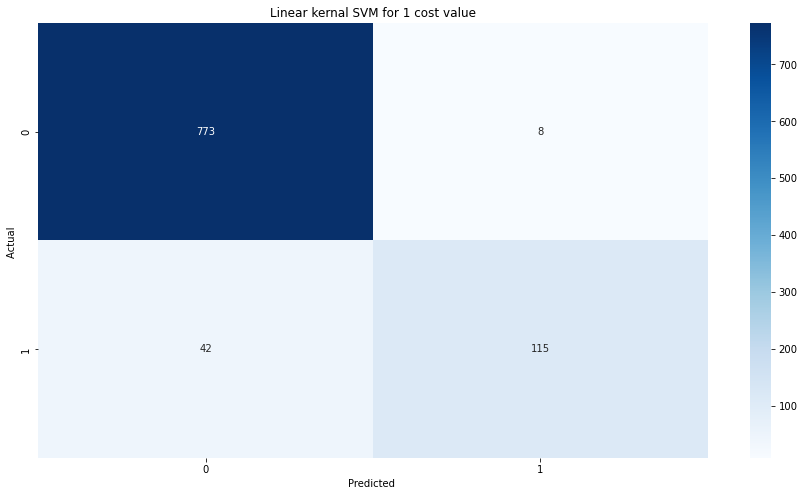

In [115]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted ")
plt.ylabel("Actual ")
plt.title('Linear kernal SVM for 1 cost value')
plt.show()

In [116]:
accuracy_score(y_test, svm_pred)

0.9466950959488273

In [84]:
svm_lin = SVC(kernel = "linear", C = 10)

In [85]:
svm_lin.fit(X_train,y_train)

SVC(C=10, kernel='linear')

In [86]:
y_pred_lin1 = svm_lin.predict(X_test)

In [87]:
cm = confusion_matrix(y_test, y_pred_lin1)
cm

array([[767,  14],
       [ 35, 122]], dtype=int64)

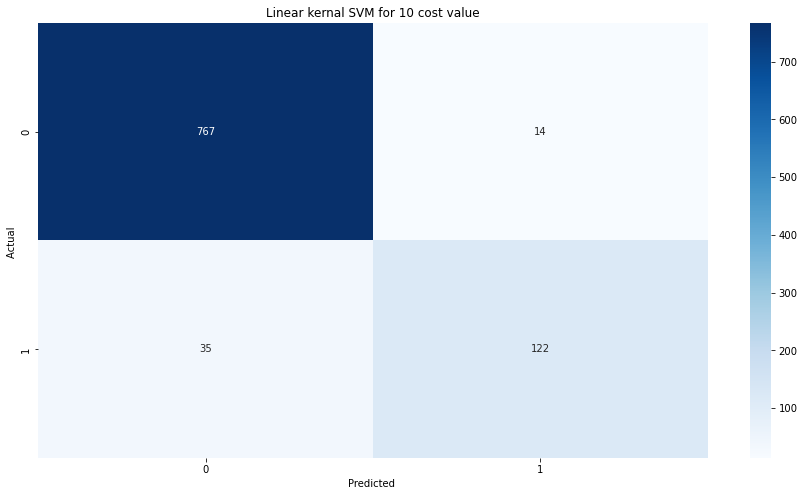

In [88]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted ")
plt.ylabel("Actual ")
plt.title('Linear kernal SVM for 10 cost value')
plt.show()

In [89]:
accuracy_score(y_test, y_pred_lin1)

0.9477611940298507

In [90]:
svm_lin = SVC(kernel = "linear", C = 0.1)

In [91]:
svm_lin.fit(X_train,y_train)

SVC(C=0.1, kernel='linear')

In [92]:
y_pred_lin2 = svm_lin.predict(X_test)

In [93]:
cm = confusion_matrix(y_test, y_pred_lin2)
cm

array([[766,  15],
       [ 33, 124]], dtype=int64)

In [94]:
accuracy_score(y_test, y_pred_lin2)

0.9488272921108742

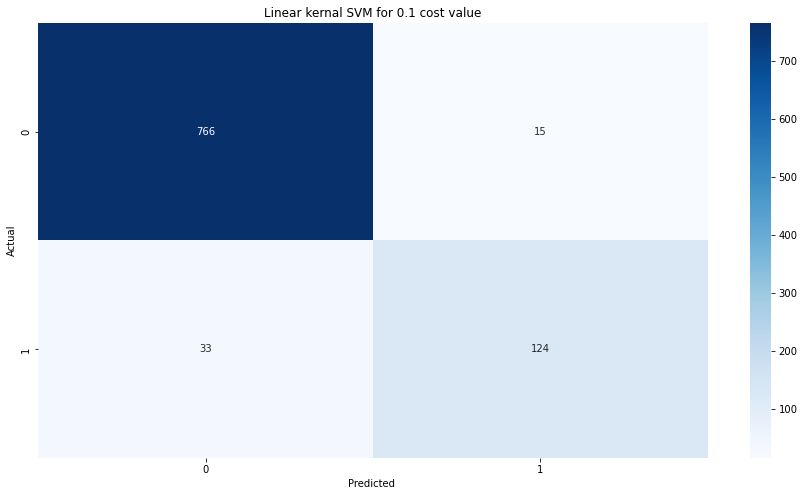

In [95]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted ")
plt.ylabel("Actual")
plt.title('Linear kernal SVM for 0.1 cost value')
plt.show()

####changing c  parameter for rbf

In [46]:

from sklearn import svm
from sklearn.model_selection import GridSearchCV

# define the SVM model with RBF kernel
svm_model = svm.SVC(kernel='rbf')

# define the range of values to search over
param_grid = {'C': [0.1, 1, 10, 50,100,200,500,1000], 'gamma': [0.1, 1, 10,50, 100,200,500,1000]}

# perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# fit the grid search on the training data
grid_search.fit(X_train, y_train)

# get the results of the grid search
results = grid_search.cv_results_

# print the accuracies for each hyperparameter combination
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print("Accuracy: %0.3f for %r" % (mean_score, params))


Accuracy: 0.860 for {'C': 0.1, 'gamma': 0.1}
Accuracy: 0.840 for {'C': 0.1, 'gamma': 1}
Accuracy: 0.840 for {'C': 0.1, 'gamma': 10}
Accuracy: 0.840 for {'C': 0.1, 'gamma': 50}
Accuracy: 0.840 for {'C': 0.1, 'gamma': 100}
Accuracy: 0.840 for {'C': 0.1, 'gamma': 200}
Accuracy: 0.840 for {'C': 0.1, 'gamma': 500}
Accuracy: 0.840 for {'C': 0.1, 'gamma': 1000}
Accuracy: 0.941 for {'C': 1, 'gamma': 0.1}
Accuracy: 0.859 for {'C': 1, 'gamma': 1}
Accuracy: 0.847 for {'C': 1, 'gamma': 10}
Accuracy: 0.845 for {'C': 1, 'gamma': 50}
Accuracy: 0.845 for {'C': 1, 'gamma': 100}
Accuracy: 0.844 for {'C': 1, 'gamma': 200}
Accuracy: 0.842 for {'C': 1, 'gamma': 500}
Accuracy: 0.841 for {'C': 1, 'gamma': 1000}
Accuracy: 0.961 for {'C': 10, 'gamma': 0.1}
Accuracy: 0.870 for {'C': 10, 'gamma': 1}
Accuracy: 0.851 for {'C': 10, 'gamma': 10}
Accuracy: 0.846 for {'C': 10, 'gamma': 50}
Accuracy: 0.845 for {'C': 10, 'gamma': 100}
Accuracy: 0.844 for {'C': 10, 'gamma': 200}
Accuracy: 0.844 for {'C': 10, 'gamma': 500

In [47]:
svm1 = SVC(kernel = 'rbf', C = 50,gamma=0.1)

In [48]:
svm1.fit(X_train, y_train)

SVC(C=50, gamma=0.1)

In [49]:
svm_pred_rbf1 = svm1.predict(X_test)

In [50]:
accuracy_score(y_test, svm_pred_rbf1)


0.9562899786780383

In [51]:
cm1 = confusion_matrix(y_test, svm_pred_rbf1)
cm1

array([[772,   9],
       [ 32, 125]], dtype=int64)

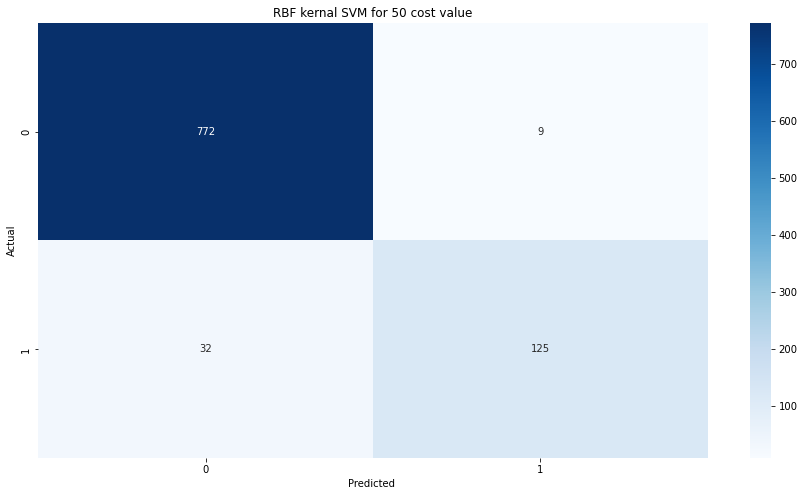

In [52]:
plt.figure(figsize = (15,8))
sns.heatmap(cm1, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted ")
plt.ylabel("Actual")
plt.title('RBF kernal SVM for 50 cost value')
plt.show()

In [53]:
svm2 = SVC(kernel = 'rbf', C = 300)
svm2.fit(X_train, y_train)
svm_pred_rbf2 = svm2.predict(X_test)

In [54]:
accuracy_score(y_test, svm_pred_rbf2)


0.9712153518123667

In [55]:
svm_pred_rbf2 = svm2.predict(X_test)
cm2 = confusion_matrix(y_test, svm_pred_rbf2)
cm2

array([[777,   4],
       [ 23, 134]], dtype=int64)

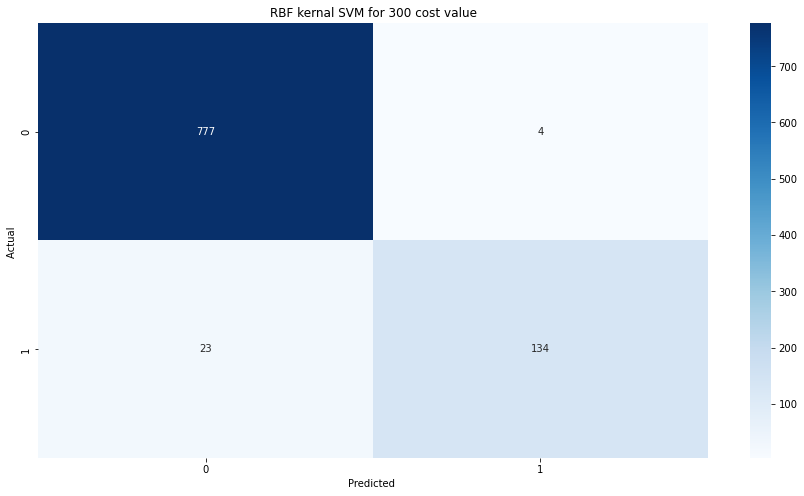

In [56]:
plt.figure(figsize = (15,8))
sns.heatmap(cm2, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted ")
plt.ylabel("Actual ")
plt.title('RBF kernal SVM for 300 cost value')
plt.show()

In [57]:
svm3 = SVC(kernel = 'rbf', C = 0.1)
svm3.fit(X_train, y_train)
svm_pred_rbf3 = svm3.predict(X_test)
accuracy_score(y_test, svm_pred_rbf3)


0.8763326226012793

In [58]:
svm_pred_rbf3 = svm3.predict(X_test)
cm3 = confusion_matrix(y_test, svm_pred_rbf3)
cm3

array([[780,   1],
       [115,  42]], dtype=int64)

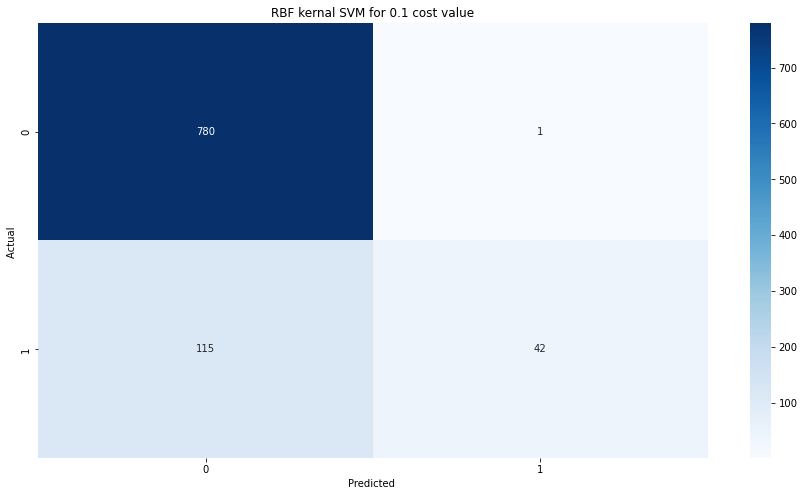

In [59]:
plt.figure(figsize = (15,8))
sns.heatmap(cm3, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted ")
plt.ylabel("Actual ")
plt.title('RBF kernal SVM for 0.1 cost value')
plt.show()

#Polynomial 

In [60]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# define the SVM model with polynomial kernel
svm_model = svm.SVC(kernel='poly')

# define the range of values to search over
param_grid = {'C': [0.1, 1, 10,50,100,200,500,1000], 'degree': [2, 3, 4, 5,6,7]}

# perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# fit the grid search on the training data
grid_search.fit(X_train, y_train)

# get the results of the grid search
results = grid_search.cv_results_

# print the accuracies for each hyperparameter combination
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print("Accuracy: %0.3f for %r" % (mean_score, params))


Accuracy: 0.842 for {'C': 0.1, 'degree': 2}
Accuracy: 0.856 for {'C': 0.1, 'degree': 3}
Accuracy: 0.852 for {'C': 0.1, 'degree': 4}
Accuracy: 0.855 for {'C': 0.1, 'degree': 5}
Accuracy: 0.853 for {'C': 0.1, 'degree': 6}
Accuracy: 0.853 for {'C': 0.1, 'degree': 7}
Accuracy: 0.900 for {'C': 1, 'degree': 2}
Accuracy: 0.910 for {'C': 1, 'degree': 3}
Accuracy: 0.881 for {'C': 1, 'degree': 4}
Accuracy: 0.876 for {'C': 1, 'degree': 5}
Accuracy: 0.869 for {'C': 1, 'degree': 6}
Accuracy: 0.865 for {'C': 1, 'degree': 7}
Accuracy: 0.942 for {'C': 10, 'degree': 2}
Accuracy: 0.933 for {'C': 10, 'degree': 3}
Accuracy: 0.918 for {'C': 10, 'degree': 4}
Accuracy: 0.906 for {'C': 10, 'degree': 5}
Accuracy: 0.886 for {'C': 10, 'degree': 6}
Accuracy: 0.881 for {'C': 10, 'degree': 7}
Accuracy: 0.956 for {'C': 50, 'degree': 2}
Accuracy: 0.936 for {'C': 50, 'degree': 3}
Accuracy: 0.929 for {'C': 50, 'degree': 4}
Accuracy: 0.913 for {'C': 50, 'degree': 5}
Accuracy: 0.901 for {'C': 50, 'degree': 6}
Accuracy: 0

In [103]:
svm_poly = SVC(kernel = 'poly')
svm_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [104]:
svm_poly_pred = svm_poly.predict(X_test)
cm = confusion_matrix(y_test, svm_poly_pred)
cm

array([[776,   5],
       [ 84,  73]], dtype=int64)

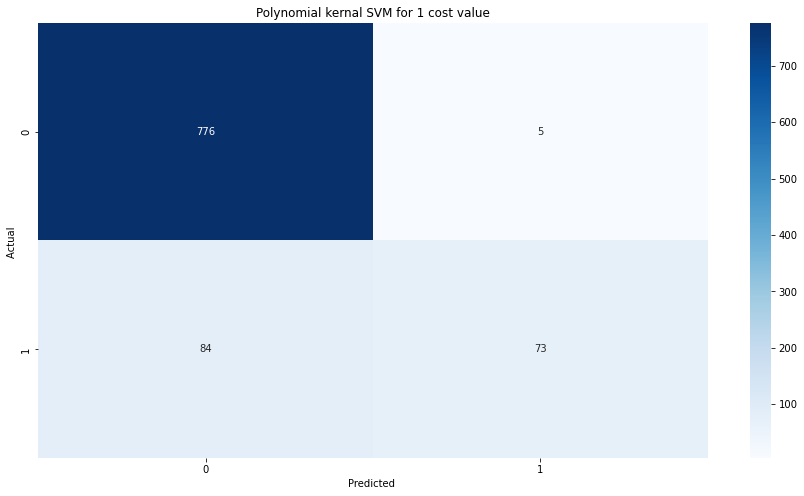

In [105]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted ")
plt.ylabel("Actual ")
plt.title('Polynomial kernal SVM for 1 cost value')
plt.show()

In [106]:
accuracy_score(y_test, svm_poly_pred)


0.9051172707889126

In [66]:
svm_poly = SVC(kernel = 'poly', C = 125)

In [67]:
svm_poly.fit(X_train,y_train)

SVC(C=125, kernel='poly')

In [68]:
svm_poly_pred_1 = svm_poly.predict(X_test)


In [69]:
cm = confusion_matrix(y_test, svm_poly_pred_1)
cm

array([[765,  16],
       [ 39, 118]], dtype=int64)

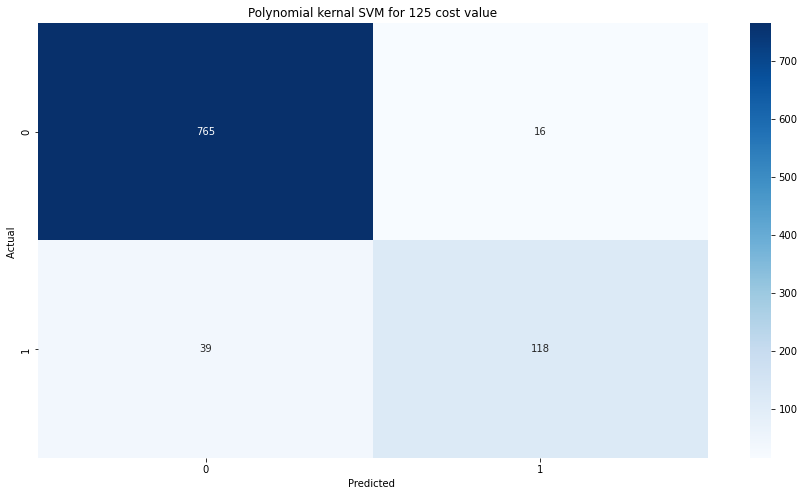

In [70]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted ")
plt.ylabel("Actual ")
plt.title('Polynomial kernal SVM for 125 cost value')
plt.show()

In [71]:
accuracy_score(y_test, svm_poly_pred_1)


0.94136460554371

In [72]:
svm_poly = SVC(kernel = 'poly', C = 340)


In [73]:
svm_poly.fit(X_train,y_train)


SVC(C=340, kernel='poly')

In [74]:
svm_poly_pred_2 = svm_poly.predict(X_test)


In [75]:
cm = confusion_matrix(y_test, svm_poly_pred_2)
cm

array([[767,  14],
       [ 36, 121]], dtype=int64)

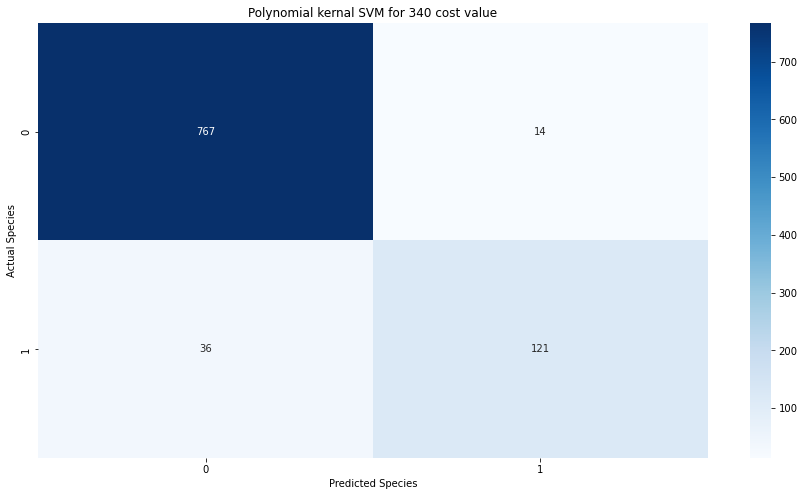

In [76]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.title('Polynomial kernal SVM for 340 cost value')
plt.show()

In [77]:
accuracy_score(y_test, svm_poly_pred_2)


0.9466950959488273